In [1]:
#Import Libraries
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
sns.set()

In [2]:
# Import Data
df = pd.read_csv("ECommerce.csv")

## Data Checking

In [3]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [4]:
df.shape

(5630, 20)

In [5]:
df.columns.values

array(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice',
       'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed',
       'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'], dtype=object)

In [6]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

In [7]:
#Convert data type
df['CustomerID'] = df['CustomerID'].astype('object')

In [8]:
df.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


Text(0.5, 1.02, 'Count of TARGET Variable per Category')

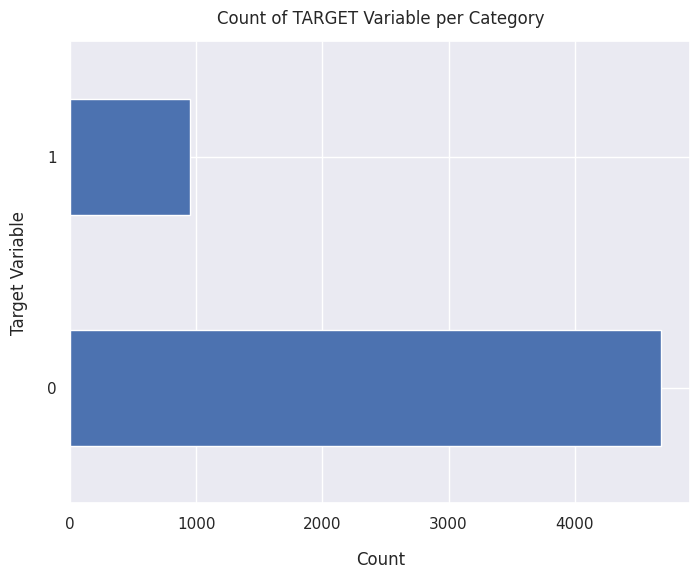

In [9]:
# Check imbalance
df['Churn'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per Category", y=1.02)

In [10]:
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

In [11]:
# Data is highly imbalance, ratio 83:17
100*df['Churn'].value_counts()/len(df['Churn'])

0    83.161634
1    16.838366
Name: Churn, dtype: float64

## Data Processing

### Handle missing values

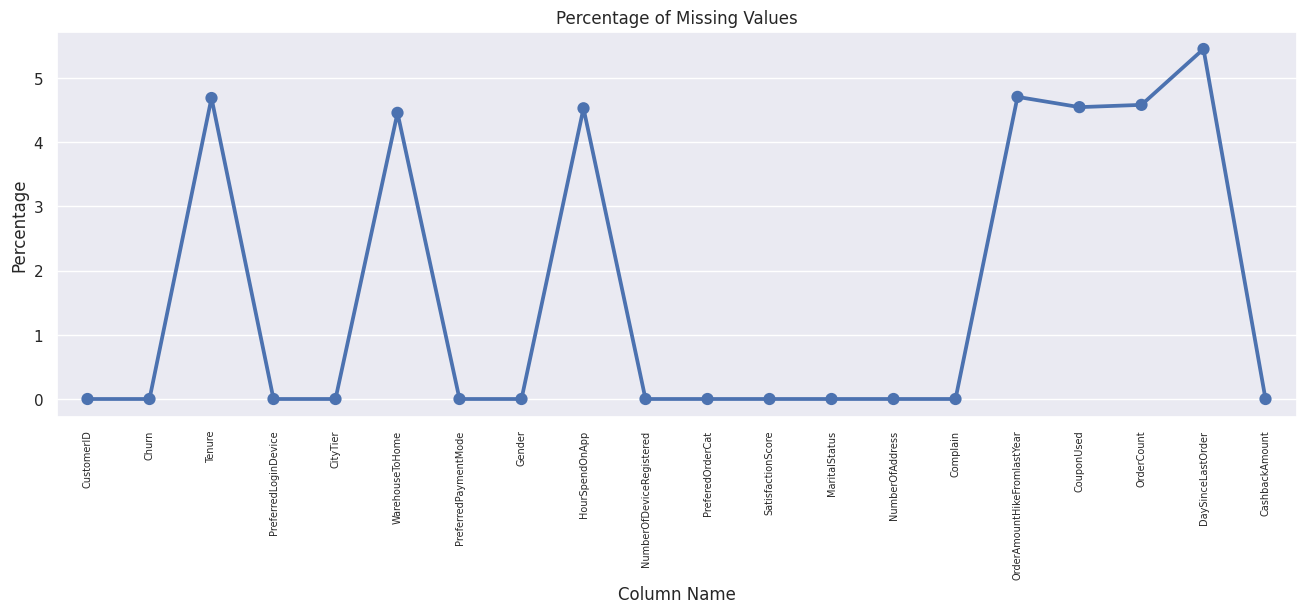

In [12]:
#Missing value

missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.xlabel("Column Name")
plt.show()


In [13]:
#Save null records as CSV
null_records = df[df.isnull().any(axis=1)]

output_filename = 'null_records.csv'

null_records.to_csv(output_filename, index=False)

print("Records with null values saved as", output_filename)

Records with null values saved as null_records.csv


In [14]:
#Drop null
df = df.dropna()

Text(0.5, 1.02, 'Count of TARGET Variable per Category')

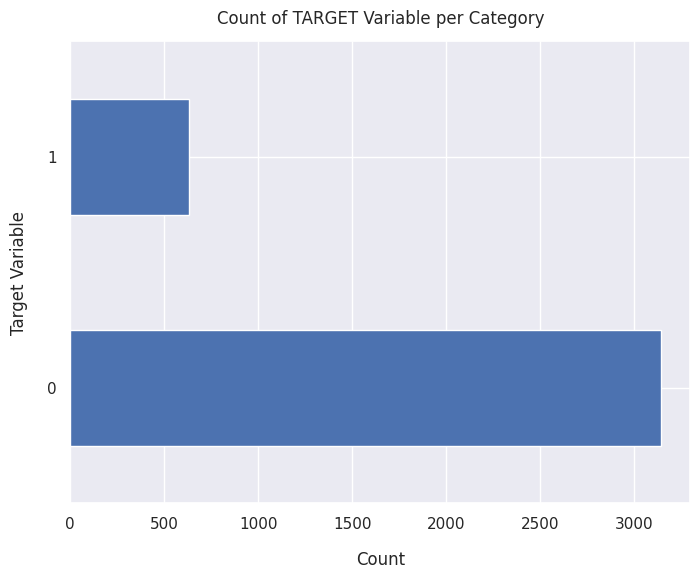

In [15]:
# Check imbalance
df['Churn'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per Category", y=1.02)

In [16]:
# Recheck imbalance percentage after dropping null values
# The dataset remains the same ratio

100*df['Churn'].value_counts()/len(df['Churn'])

0    83.280339
1    16.719661
Name: Churn, dtype: float64

### Feature Engineering

In [17]:
#Copy dataset for EDA
df_new = df.copy()

#### Tenure

In [18]:
# Get the highest tenure
print(df_new['Tenure'].max())

51.0


In [19]:
# Group the tenure in bins of 6
labels = ["{0} - {1}".format(i, i + 5) for i in range(0, 51, 6)]

df_new['TenureGroup'] = pd.cut(df.Tenure, bins=range(0, 60, 6), right=False, labels=labels)

df_new['TenureGroup'].value_counts()

0 - 5      1551
6 - 11     1040
12 - 17     640
18 - 23     333
24 - 29     146
30 - 35      62
48 - 53       2
36 - 41       0
42 - 47       0
Name: TenureGroup, dtype: int64

#### WarehouseToHome

In [20]:
# Group the tenure in bins of 10 km
labels = ["{0} - {1}".format(i, i + 9) for i in range(0, 60, 10)]

df_new['WHtoHomeGroup'] = pd.cut(df.Tenure, bins=range(0, 62, 10), right=False, labels=labels)

df_new['WHtoHomeGroup'].value_counts()

0 - 9      2283
10 - 19    1120
20 - 29     307
30 - 39      62
50 - 59       2
40 - 49       0
Name: WHtoHomeGroup, dtype: int64

### Drop Unused Columns

In [21]:
df_new.drop(columns=['CustomerID', 'Tenure', 'WarehouseToHome'], inplace=True)

## Data Exploration

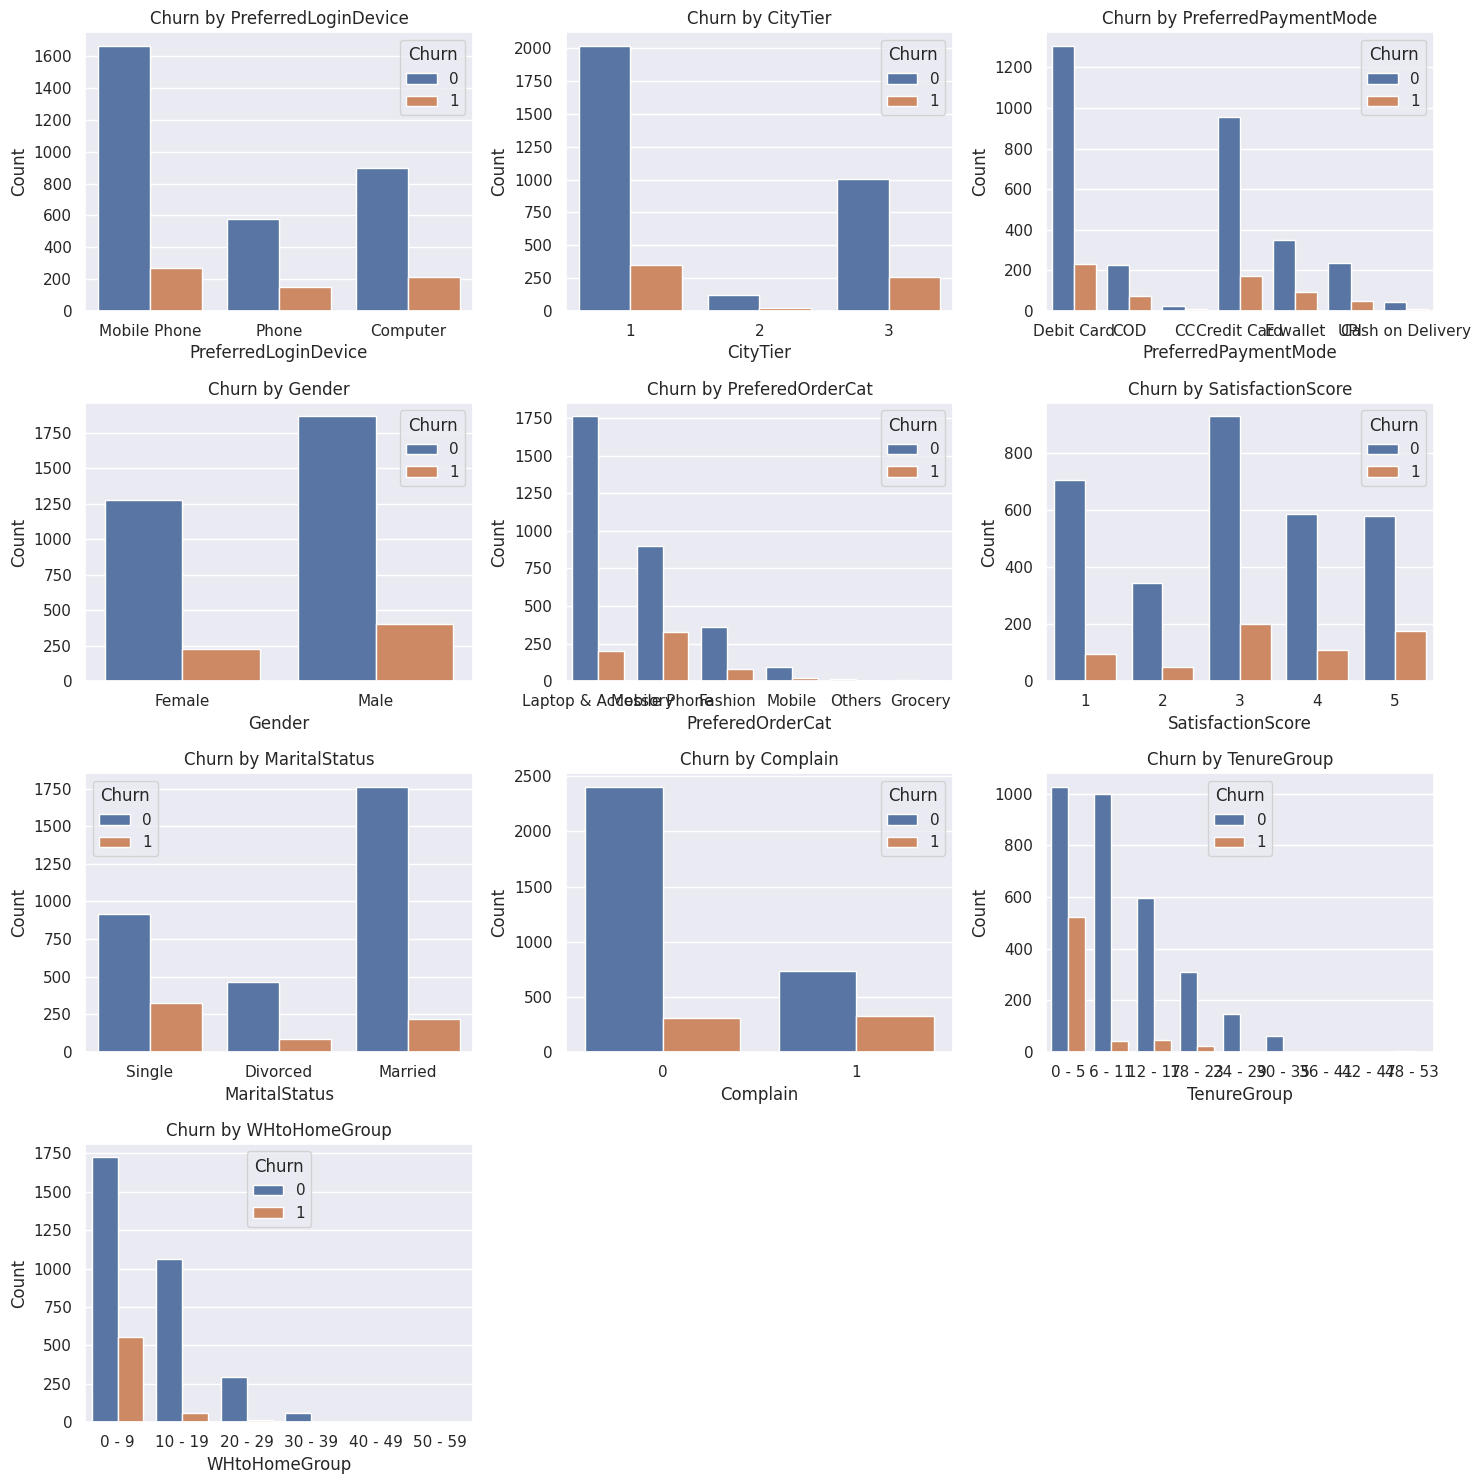

In [23]:
predictors = df_new.drop(columns=['Churn', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'])

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 15))

# Flatten the axes array for easier iteration
axes = axes.ravel()

# Loop through predictors and create count plots
for i, predictor in enumerate(predictors.columns):
    sns.countplot(data=df_new, x=predictor, hue='Churn', ax=axes[i])
    axes[i].set_title(f'Churn by {predictor}')
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel('Count')

# Remove any empty subplots if the number of predictors is less than 9
for j in range(i + 1, 12):
    fig.delaxes(axes[j])

# Adjust layout spacing
plt.tight_layout()

# Show the plots
plt.show()


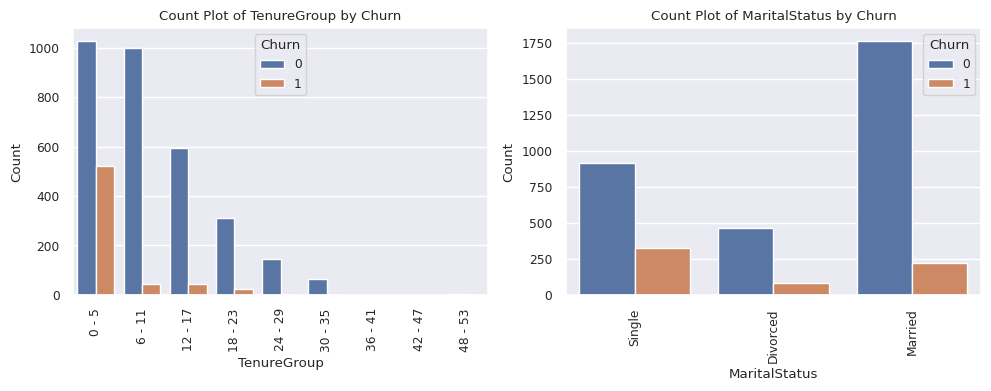

In [24]:
#Churn by TenureGroup and MaritalStatus

sns.set(font_scale=0.8)
categorical_vars = ['TenureGroup', 'MaritalStatus']

fig, axes = plt.subplots(1, len(categorical_vars), figsize=(10, 4))

for i, var in enumerate(categorical_vars):
    sns.countplot(data=df_new, x=var, hue='Churn', ax=axes[i])
    axes[i].set_title(f"Count Plot of {var} by Churn")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.show()

<ipython-input-25-4caee52e4a60>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[predictor][(df_new["Churn"] == 0)], color="Blue", shade=True, ax=axes[i])
<ipython-input-25-4caee52e4a60>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[predictor][(df_new["Churn"] == 1)], color="Red", shade=True, ax=axes[i])
<ipython-input-25-4caee52e4a60>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[predictor][(df_new["Churn"] == 0)], color="Blue", shade=True, ax=axes[i])
<ipython-input-25-4caee52e4a60>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in sea

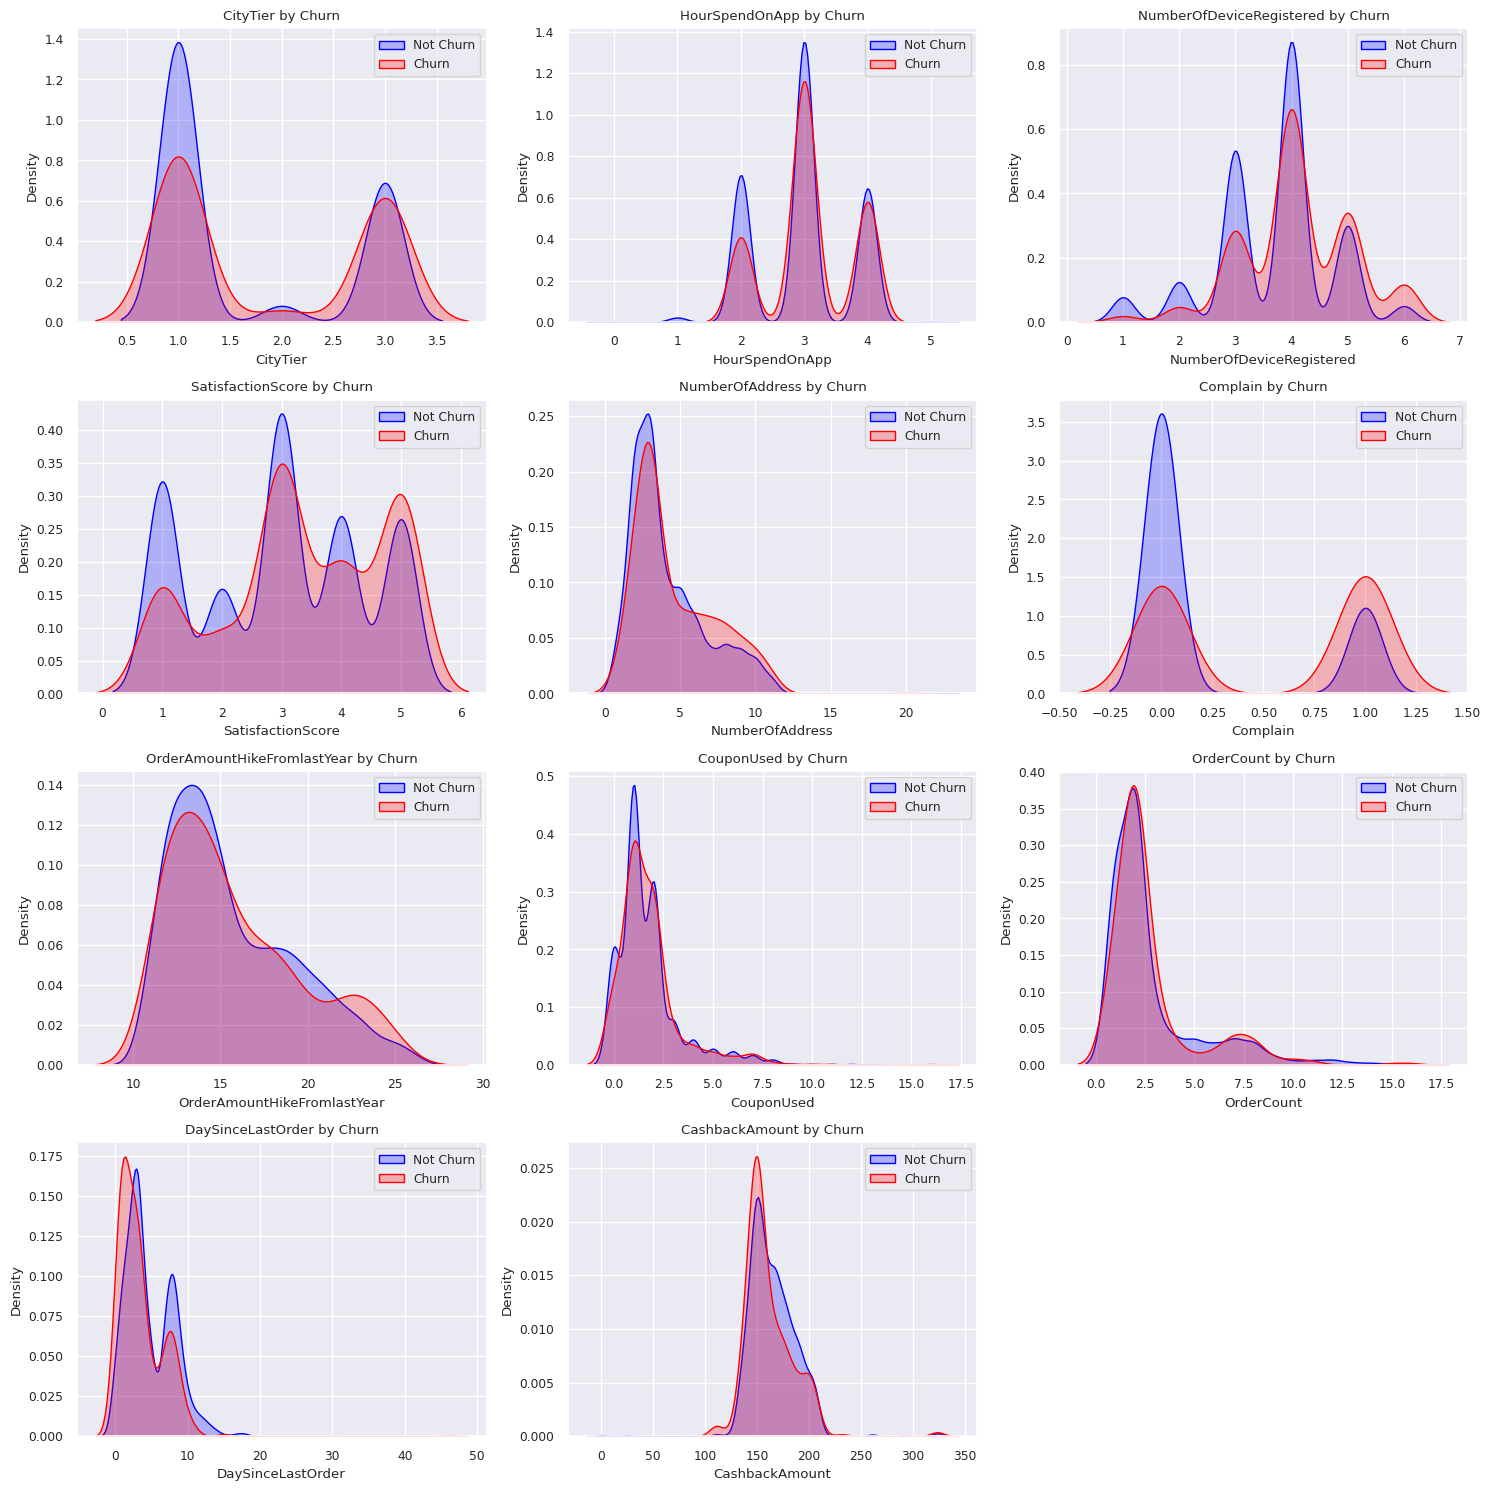

In [25]:
predictors = ['CityTier', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

fig, axes = plt.subplots(4, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Loop through the features and plot KDE for each one
for i, predictor in enumerate(predictors):
    sns.kdeplot(df[predictor][(df_new["Churn"] == 0)], color="Blue", shade=True, ax=axes[i])
    sns.kdeplot(df[predictor][(df_new["Churn"] == 1)], color="Red", shade=True, ax=axes[i])
    axes[i].legend(["Not Churn", "Churn"], loc='upper right')
    axes[i].set_ylabel('Density')
    axes[i].set_xlabel(predictor)
    axes[i].set_title(f'{predictor} by Churn')

# Hide any remaining empty subplots
for i in range(len(predictors), len(axes)):
    fig.delaxes(axes[i])

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

<ipython-input-26-4d4b2bcfc9af>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_new[predictor][(df["Churn"] == 0)], color="Blue", shade=True, ax=axes[i])
<ipython-input-26-4d4b2bcfc9af>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_new[predictor][(df["Churn"] == 1)], color="Red", shade=True, ax=axes[i])
<ipython-input-26-4d4b2bcfc9af>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_new[predictor][(df["Churn"] == 0)], color="Blue", shade=True, ax=axes[i])
<ipython-input-26-4d4b2bcfc9af>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in sea

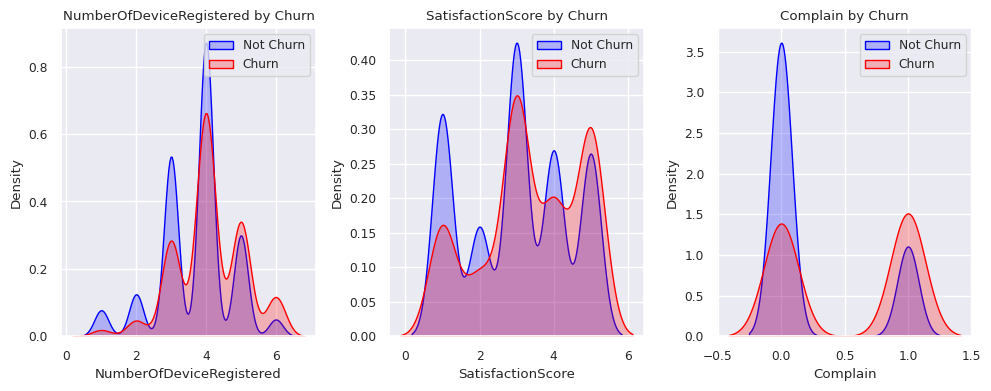

In [26]:
# Churn by NumberOfDeviceRegistered, SatisfactionScore, and Complain

predictors = ['NumberOfDeviceRegistered', 'SatisfactionScore', 'Complain']

fig, axes = plt.subplots(1, 3, figsize=(10, 4))

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Loop through the features and plot KDE for each one
for i, predictor in enumerate(predictors):
    sns.kdeplot(df_new[predictor][(df["Churn"] == 0)], color="Blue", shade=True, ax=axes[i])
    sns.kdeplot(df_new[predictor][(df["Churn"] == 1)], color="Red", shade=True, ax=axes[i])
    axes[i].legend(["Not Churn", "Churn"], loc='upper right')
    axes[i].set_ylabel('Density')
    axes[i].set_xlabel(predictor)
    axes[i].set_title(f'{predictor} by Churn')

# Hide any remaining empty subplots
for i in range(len(predictors), len(axes)):
    fig.delaxes(axes[i])

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

## Model

In [27]:
#Encode categorical data
cat_data = pd.DataFrame()

#Map for replacing value
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].map({'Mobile Phone':0,
                             'Phone':1,
                             'Computer':2})

df['PreferredPaymentMode'] = df['PreferredPaymentMode'].map({'Debit Card':0,
                             'COD':1,
                             'CC':2,
                             'Credit Card':3,
                             'E wallet':4,
                             'UPI':5,
                             'Cash on Delivery':6})

df['Gender'] = df['Gender'].map({'Female':0,
                             'Male':1})

df['PreferedOrderCat'] = df['PreferedOrderCat'].map({'Laptop & Accessory':0,
                             'Mobile Phone':1,
                             'Fashion':2,
                             'Mobile':3,
                             'Others':4,
                             'Grocery':5})

df['MaritalStatus'] = df['MaritalStatus'].map({'Single':0,
                             'Divorced':1,
                             'Married':2})

cat_data = pd.concat([cat_data, df['PreferredLoginDevice']], axis=1)
cat_data = pd.concat([cat_data, df['PreferredPaymentMode']], axis=1)
cat_data = pd.concat([cat_data, df['Gender']], axis=1)
cat_data = pd.concat([cat_data, df['PreferedOrderCat']], axis=1)
cat_data = pd.concat([cat_data, df['MaritalStatus']], axis=1)

cat_data

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,0,0,0,0,0
3,1,0,1,0,0
5,2,0,0,1,0
11,0,0,1,2,0
12,1,1,1,3,0
...,...,...,...,...,...
5624,0,5,0,1,0
5625,2,3,1,0,2
5627,0,0,1,0,2
5628,2,3,1,0,2


In [28]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,0,3,6.0,0,0,3.0,3,0,2,0,9,1,11.0,1.0,1.0,5.0,160
3,50004,1,0.0,1,3,15.0,0,1,2.0,4,0,5,0,8,0,23.0,0.0,1.0,3.0,134
5,50006,1,0.0,2,1,22.0,0,0,3.0,5,1,5,0,2,1,22.0,4.0,6.0,7.0,139
11,50012,1,11.0,0,1,6.0,0,1,3.0,4,2,3,0,10,1,13.0,0.0,1.0,0.0,154
12,50013,1,0.0,1,1,11.0,1,1,2.0,3,3,3,0,2,1,13.0,2.0,2.0,2.0,134


## Model creation and evaluation

In [35]:
#Install packages

#Models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

#Model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, auc
from sklearn.metrics import precision_recall_fscore_support

#Imbalance data
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [31]:
X = df[['Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']]
y = df['Churn']

In [32]:
#Split train/test and identify startify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)

###No Sampling

Classifier: KNeighborsClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1885
           1       0.78      0.55      0.65       379

    accuracy                           0.90      2264
   macro avg       0.85      0.76      0.79      2264
weighted avg       0.89      0.90      0.89      2264

Test classification report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1258
           1       0.58      0.40      0.47       252

    accuracy                           0.85      1510
   macro avg       0.73      0.67      0.69      1510
weighted avg       0.84      0.85      0.84      1510



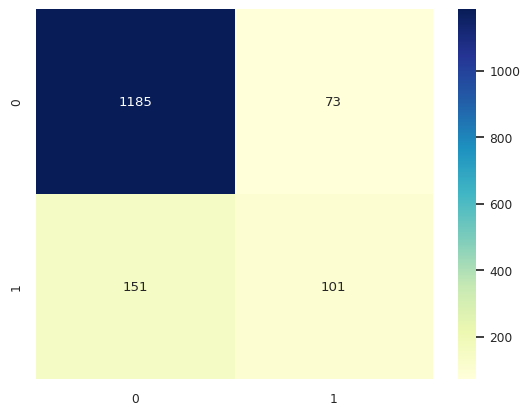

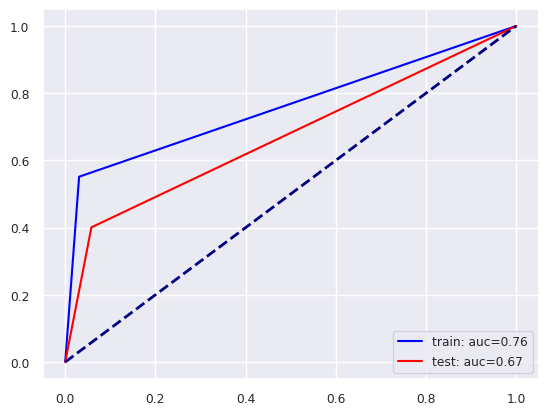

<ipython-input-39-9b08fc17c843>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Classifier': clf_name,
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


----------------------------------------------------------------------------------------------------
Classifier: LogisticRegression
Train classification report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1885
           1       0.74      0.54      0.63       379

    accuracy                           0.89      2264
   macro avg       0.82      0.75      0.78      2264
weighted avg       0.88      0.89      0.88      2264

Test classification report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1258
           1       0.74      0.50      0.60       252

    accuracy                           0.89      1510
   macro avg       0.82      0.73      0.77      1510
weighted avg       0.88      0.89      0.88      1510



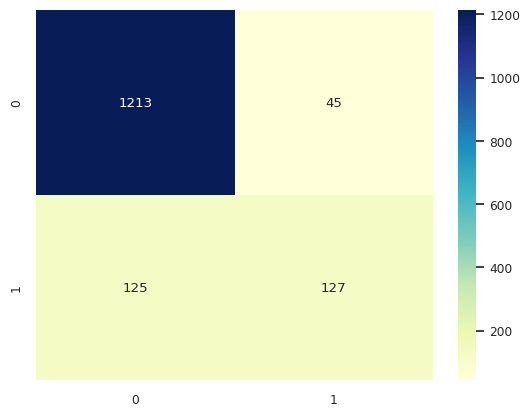

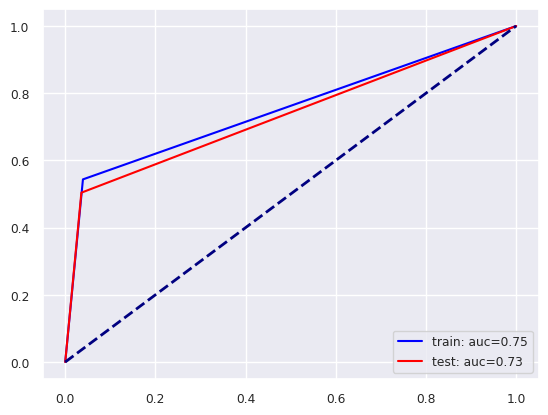

<ipython-input-39-9b08fc17c843>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Classifier': clf_name,


----------------------------------------------------------------------------------------------------
Classifier: GradientBoostingClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1885
           1       0.92      0.78      0.84       379

    accuracy                           0.95      2264
   macro avg       0.94      0.88      0.91      2264
weighted avg       0.95      0.95      0.95      2264

Test classification report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1258
           1       0.82      0.65      0.73       252

    accuracy                           0.92      1510
   macro avg       0.88      0.81      0.84      1510
weighted avg       0.91      0.92      0.91      1510



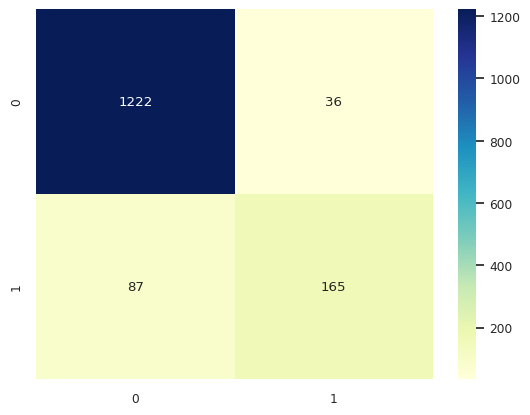

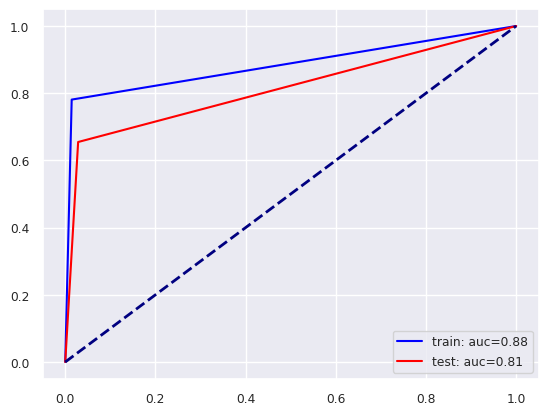

<ipython-input-39-9b08fc17c843>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Classifier': clf_name,


----------------------------------------------------------------------------------------------------
Classifier: RandomForestClassifier
Train classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1885
           1       1.00      1.00      1.00       379

    accuracy                           1.00      2264
   macro avg       1.00      1.00      1.00      2264
weighted avg       1.00      1.00      1.00      2264

Test classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1258
           1       0.93      0.81      0.86       252

    accuracy                           0.96      1510
   macro avg       0.94      0.90      0.92      1510
weighted avg       0.96      0.96      0.96      1510



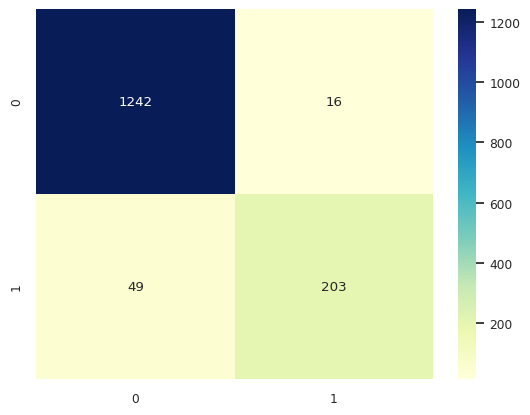

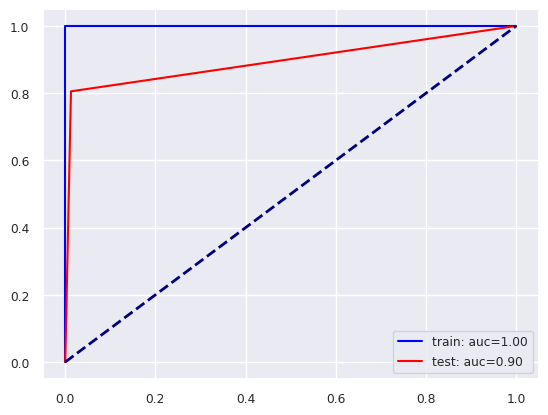

<ipython-input-39-9b08fc17c843>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Classifier': clf_name,


----------------------------------------------------------------------------------------------------
Classifier: BaggingClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1885
           1       1.00      0.97      0.99       379

    accuracy                           1.00      2264
   macro avg       1.00      0.99      0.99      2264
weighted avg       1.00      1.00      1.00      2264

Test classification report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1258
           1       0.86      0.73      0.79       252

    accuracy                           0.94      1510
   macro avg       0.91      0.85      0.88      1510
weighted avg       0.93      0.94      0.93      1510



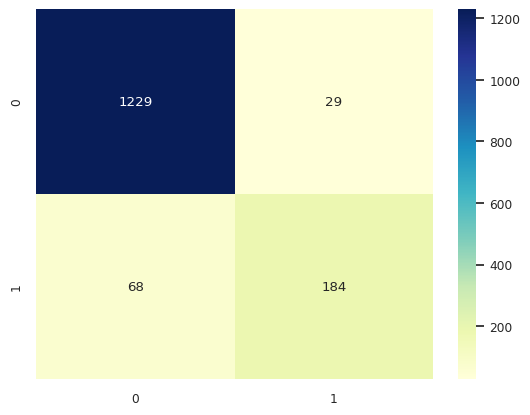

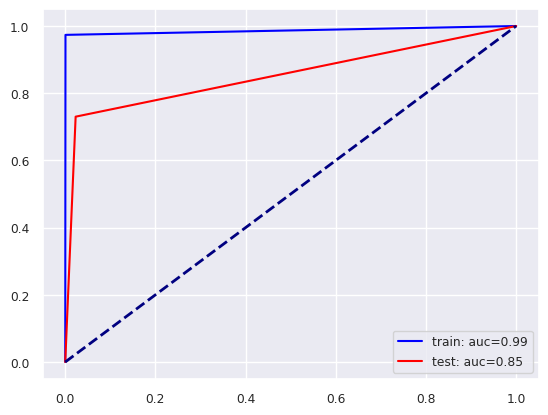

<ipython-input-39-9b08fc17c843>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Classifier': clf_name,


----------------------------------------------------------------------------------------------------
Classifier: GaussianNB
Train classification report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1885
           1       0.68      0.56      0.62       379

    accuracy                           0.88      2264
   macro avg       0.80      0.76      0.77      2264
weighted avg       0.88      0.88      0.88      2264

Test classification report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1258
           1       0.66      0.51      0.58       252

    accuracy                           0.88      1510
   macro avg       0.79      0.73      0.75      1510
weighted avg       0.87      0.88      0.87      1510



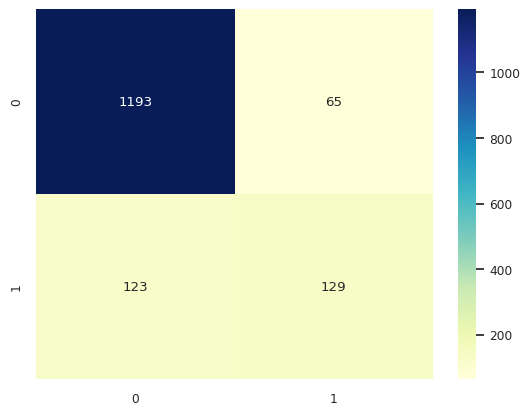

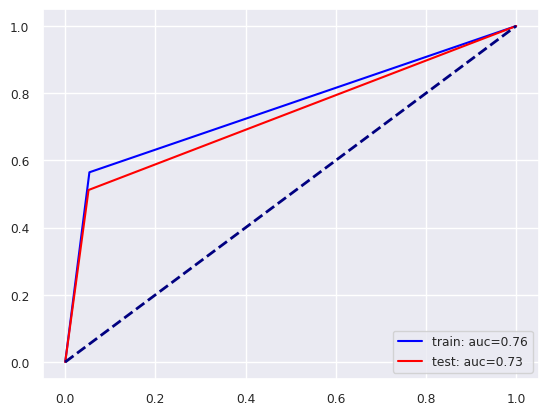

<ipython-input-39-9b08fc17c843>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Classifier': clf_name,


----------------------------------------------------------------------------------------------------
Classifier: XGBClassifier
Train classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1885
           1       1.00      1.00      1.00       379

    accuracy                           1.00      2264
   macro avg       1.00      1.00      1.00      2264
weighted avg       1.00      1.00      1.00      2264

Test classification report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1258
           1       0.87      0.84      0.86       252

    accuracy                           0.95      1510
   macro avg       0.92      0.91      0.91      1510
weighted avg       0.95      0.95      0.95      1510



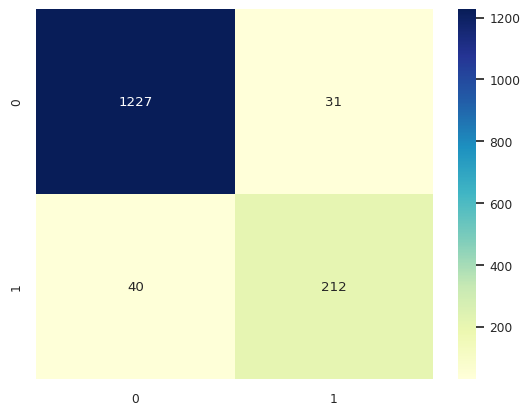

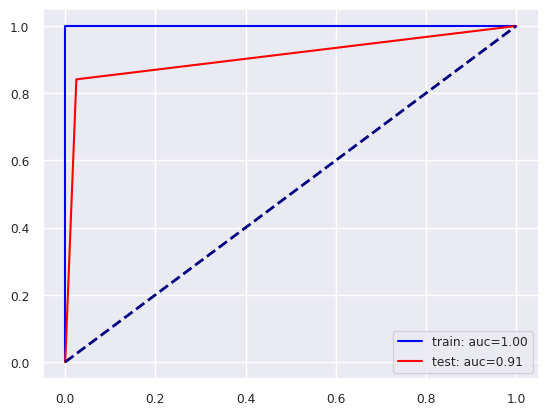

----------------------------------------------------------------------------------------------------
Summary of Classifier Scores:
                   Classifier  Precision    Recall  F1-Score Support       AUC
6                     XGBoost   0.872428  0.841270  0.856566    None  0.908314
3      RandomForestClassifier   0.926941  0.805556  0.861996    None  0.896418
4           BaggingClassifier   0.863850  0.730159  0.791398    None  0.853553
2  GradientBoostingClassifier   0.820896  0.654762  0.728477    None  0.813073
1          LogisticRegression   0.738372  0.503968  0.599057    None  0.734099
5                  GaussianNB   0.664948  0.511905  0.578475    None  0.730118
0        KneighborsClassifier   0.580460  0.400794  0.474178    None  0.671383


<ipython-input-39-9b08fc17c843>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Classifier': clf_name,


In [39]:
# List of classifiers
classifiers = [
    [KNeighborsClassifier(n_neighbors=5), 'KneighborsClassifier'],
    [LogisticRegression(solver='lbfgs'), 'LogisticRegression'],
    [GradientBoostingClassifier(), 'GradientBoostingClassifier'],
    [RandomForestClassifier(), 'RandomForestClassifier'],
    [BaggingClassifier(), 'BaggingClassifier'],
    [GaussianNB(), 'GaussianNB'],
    [xgb.XGBClassifier(), 'XGBoost']
]

def evaluate_classifiers(classifiers, X_train, X_test, y_train, y_test, include_best_model=False):
    score_df = pd.DataFrame(columns=['Classifier', 'Precision', 'Recall', 'F1-Score', 'Support', 'AUC'])

    for clf, clf_name in classifiers:
        clf.fit(X_train, y_train)
        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)

        print(f"Classifier: {clf.__class__.__name__}")
        print("Train classification report:")
        print(classification_report(y_train, y_pred_train))
        print("Test classification report:")
        print(classification_report(y_test, y_pred_test))

        sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='g', cmap='YlGnBu')
        plt.show()

        fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
        auc_train = roc_auc_score(y_train, y_pred_train)
        plt.plot(fpr_train, tpr_train, color='Blue', label='train: auc=' + f'{auc_train:.2f}')

        fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
        auc_test = roc_auc_score(y_test, y_pred_test)
        plt.plot(fpr_test, tpr_test, color='Red', label='test: auc=' + f'{auc_test:.2f}')

        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.legend(loc=4)
        plt.show()

        precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_test, average='binary')
        auc_test = roc_auc_score(y_test, y_pred_test)

        score_df = score_df.append({'Classifier': clf_name,
                                    'Precision': precision,
                                    'Recall': recall,
                                    'F1-Score': f1,
                                    'Support': support,
                                    'AUC': auc_test},
                                   ignore_index=True)

        print('-' * 100)

    score_df = score_df.sort_values(by='AUC', ascending=False)

    print("Summary of Classifier Scores:")
    print(score_df)

# Set1: List of classifiers
classifiers = [
    [KNeighborsClassifier(n_neighbors=5), 'KneighborsClassifier'],
    [LogisticRegression(solver='lbfgs'), 'LogisticRegression'],
    [GradientBoostingClassifier(), 'GradientBoostingClassifier'],
    [RandomForestClassifier(), 'RandomForestClassifier'],
    [BaggingClassifier(), 'BaggingClassifier'],
    [GaussianNB(), 'GaussianNB'],
    [xgb.XGBClassifier(), 'XGBoost']
]


# Call the function for Set1 without including the best model
evaluate_classifiers(classifiers, X_train, X_test, y_train, y_test, include_best_model=False)


###Resampling

Resampling Method: Random Undersampling
Classifier: KNeighborsClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       379
           1       0.81      0.82      0.81       379

    accuracy                           0.81       758
   macro avg       0.81      0.81      0.81       758
weighted avg       0.81      0.81      0.81       758

Test classification report:
              precision    recall  f1-score   support

           0       0.94      0.73      0.82      1258
           1       0.36      0.77      0.49       252

    accuracy                           0.74      1510
   macro avg       0.65      0.75      0.66      1510
weighted avg       0.84      0.74      0.77      1510



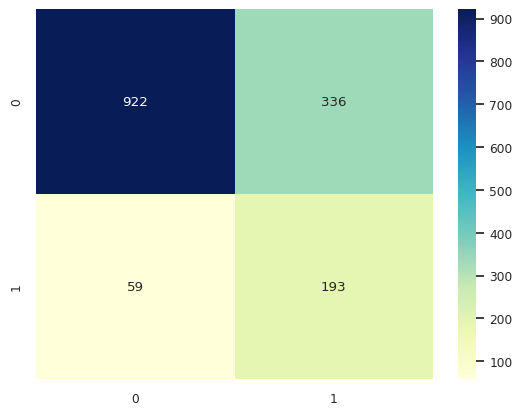

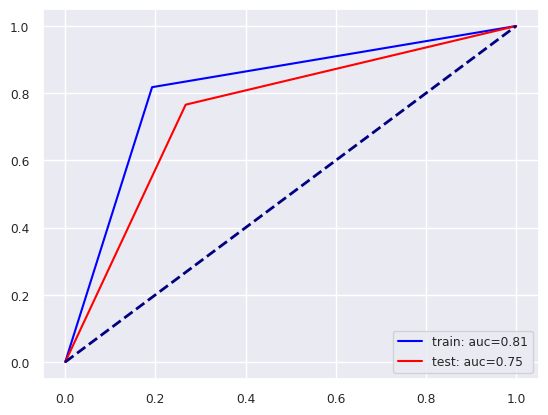

----------------------------------------------------------------------------------------------------


<ipython-input-40-3ce361fe56c4>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Resampling Method': resampler_name,
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier: LogisticRegression
Train classification report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       379
           1       0.81      0.85      0.83       379

    accuracy                           0.83       758
   macro avg       0.83      0.83      0.83       758
weighted avg       0.83      0.83      0.83       758

Test classification report:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      1258
           1       0.44      0.82      0.57       252

    accuracy                           0.80      1510
   macro avg       0.70      0.81      0.72      1510
weighted avg       0.87      0.80      0.82      1510



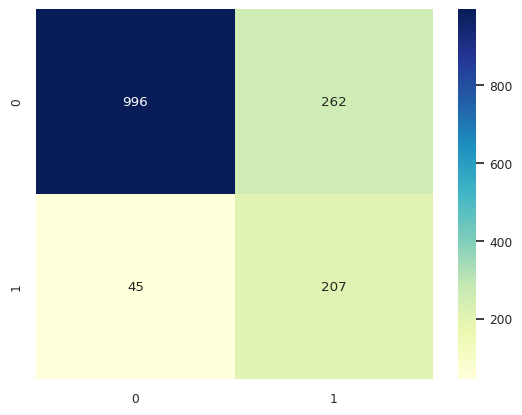

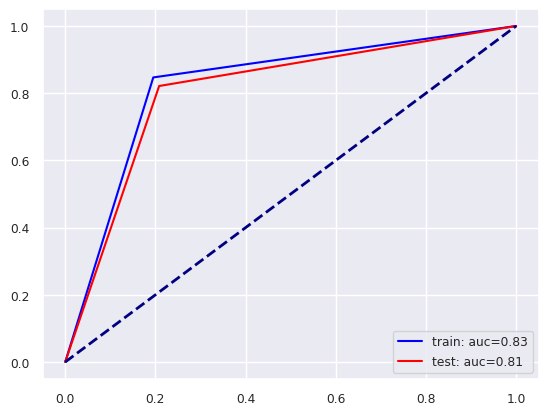

----------------------------------------------------------------------------------------------------


<ipython-input-40-3ce361fe56c4>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Resampling Method': resampler_name,


Classifier: GradientBoostingClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       379
           1       0.95      0.95      0.95       379

    accuracy                           0.95       758
   macro avg       0.95      0.95      0.95       758
weighted avg       0.95      0.95      0.95       758

Test classification report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1258
           1       0.55      0.86      0.67       252

    accuracy                           0.86      1510
   macro avg       0.76      0.86      0.79      1510
weighted avg       0.90      0.86      0.87      1510



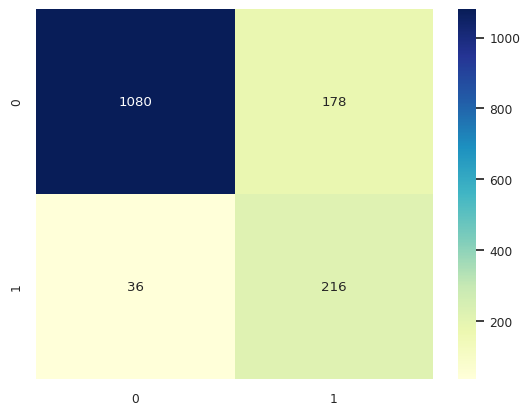

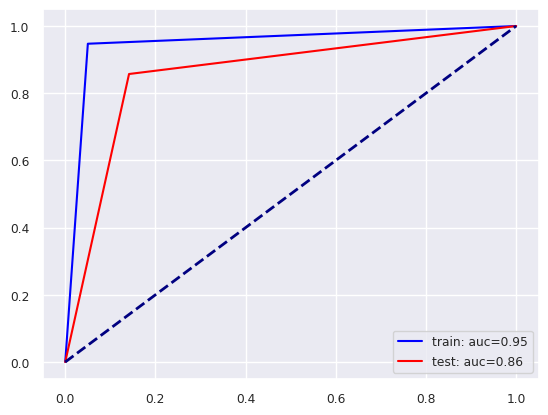

----------------------------------------------------------------------------------------------------


<ipython-input-40-3ce361fe56c4>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Resampling Method': resampler_name,


Classifier: RandomForestClassifier
Train classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       379
           1       1.00      1.00      1.00       379

    accuracy                           1.00       758
   macro avg       1.00      1.00      1.00       758
weighted avg       1.00      1.00      1.00       758

Test classification report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1258
           1       0.59      0.92      0.72       252

    accuracy                           0.88      1510
   macro avg       0.79      0.90      0.82      1510
weighted avg       0.92      0.88      0.89      1510



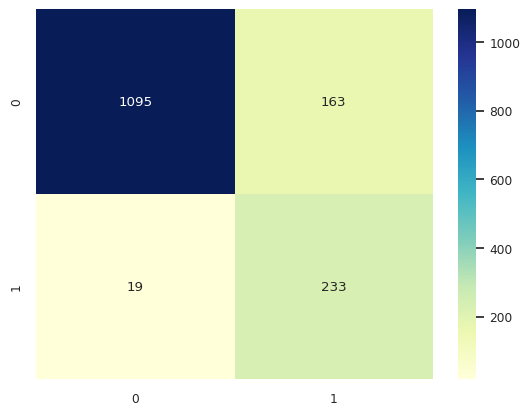

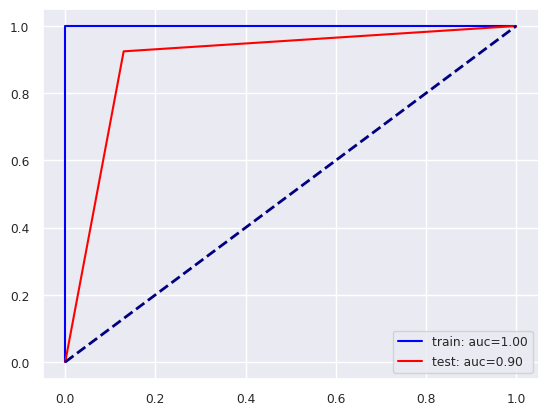

----------------------------------------------------------------------------------------------------
Classifier: BaggingClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       379
           1       0.99      0.98      0.99       379

    accuracy                           0.99       758
   macro avg       0.99      0.99      0.99       758
weighted avg       0.99      0.99      0.99       758

Test classification report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1258
           1       0.58      0.87      0.69       252

    accuracy                           0.87      1510
   macro avg       0.77      0.87      0.81      1510
weighted avg       0.90      0.87      0.88      1510



<ipython-input-40-3ce361fe56c4>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Resampling Method': resampler_name,


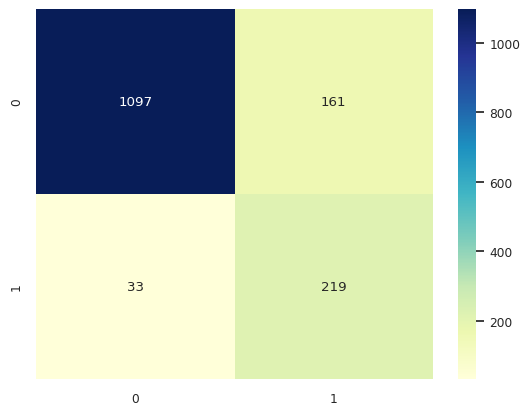

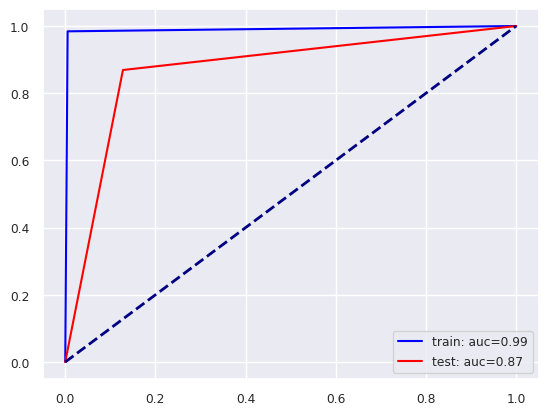

----------------------------------------------------------------------------------------------------
Classifier: GaussianNB
Train classification report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       379
           1       0.77      0.85      0.81       379

    accuracy                           0.80       758
   macro avg       0.80      0.80      0.80       758
weighted avg       0.80      0.80      0.80       758

Test classification report:
              precision    recall  f1-score   support

           0       0.95      0.71      0.81      1258
           1       0.36      0.81      0.50       252

    accuracy                           0.73      1510
   macro avg       0.66      0.76      0.66      1510
weighted avg       0.85      0.73      0.76      1510



<ipython-input-40-3ce361fe56c4>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Resampling Method': resampler_name,


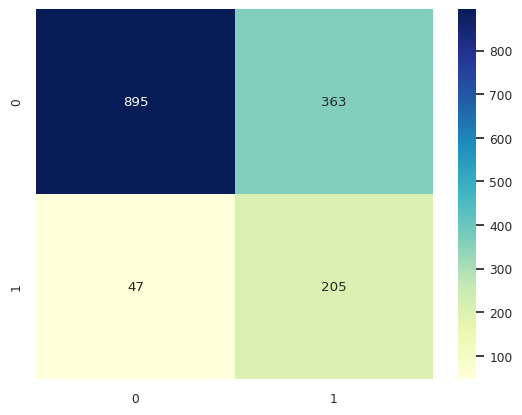

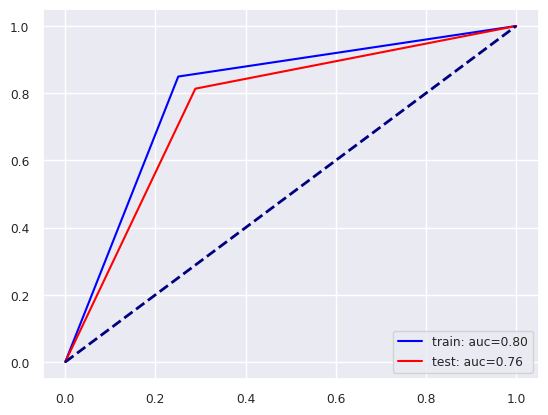

----------------------------------------------------------------------------------------------------
Classifier: XGBClassifier
Train classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       379
           1       1.00      1.00      1.00       379

    accuracy                           1.00       758
   macro avg       1.00      1.00      1.00       758
weighted avg       1.00      1.00      1.00       758

Test classification report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      1258
           1       0.57      0.92      0.70       252

    accuracy                           0.87      1510
   macro avg       0.77      0.89      0.81      1510
weighted avg       0.91      0.87      0.88      1510



<ipython-input-40-3ce361fe56c4>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Resampling Method': resampler_name,


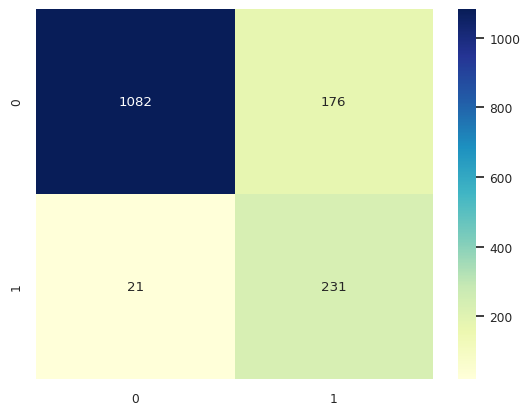

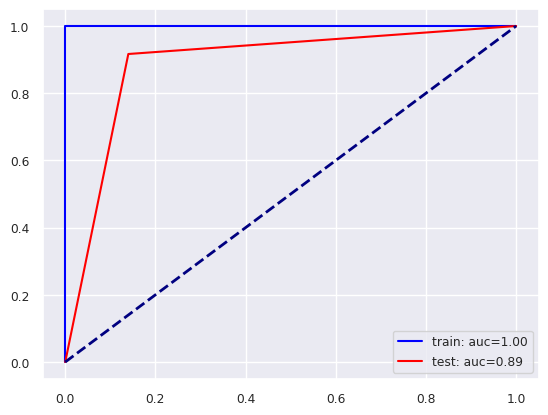

----------------------------------------------------------------------------------------------------
Resampling Method: Random Oversampling


<ipython-input-40-3ce361fe56c4>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Resampling Method': resampler_name,


Classifier: KNeighborsClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1885
           1       0.88      0.99      0.94      1885

    accuracy                           0.93      3770
   macro avg       0.94      0.93      0.93      3770
weighted avg       0.94      0.93      0.93      3770

Test classification report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      1258
           1       0.47      0.84      0.60       252

    accuracy                           0.82      1510
   macro avg       0.72      0.82      0.74      1510
weighted avg       0.88      0.82      0.83      1510



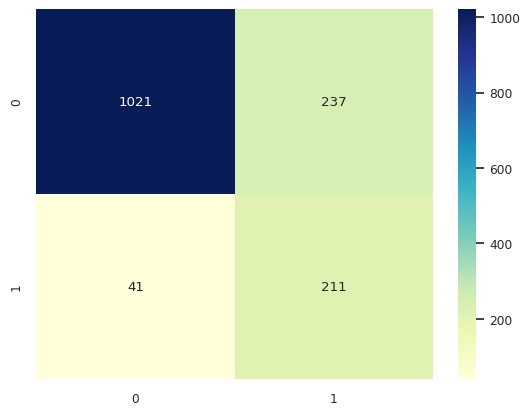

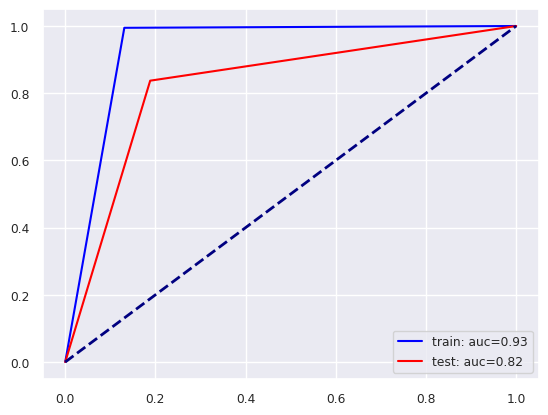

----------------------------------------------------------------------------------------------------


<ipython-input-40-3ce361fe56c4>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Resampling Method': resampler_name,
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier: LogisticRegression
Train classification report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1885
           1       0.81      0.85      0.83      1885

    accuracy                           0.83      3770
   macro avg       0.83      0.83      0.83      3770
weighted avg       0.83      0.83      0.83      3770

Test classification report:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      1258
           1       0.44      0.82      0.57       252

    accuracy                           0.80      1510
   macro avg       0.70      0.81      0.72      1510
weighted avg       0.87      0.80      0.82      1510



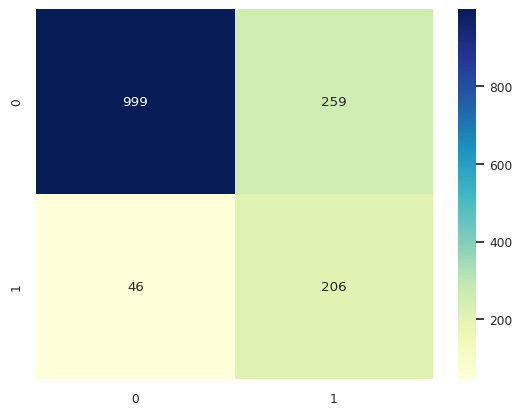

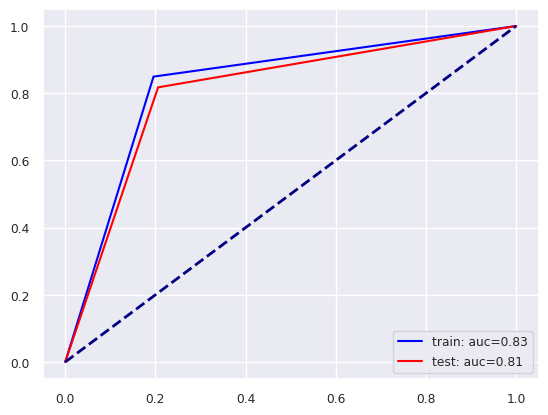

----------------------------------------------------------------------------------------------------


<ipython-input-40-3ce361fe56c4>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Resampling Method': resampler_name,


Classifier: GradientBoostingClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1885
           1       0.93      0.92      0.92      1885

    accuracy                           0.92      3770
   macro avg       0.92      0.92      0.92      3770
weighted avg       0.92      0.92      0.92      3770

Test classification report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1258
           1       0.65      0.83      0.73       252

    accuracy                           0.90      1510
   macro avg       0.81      0.87      0.83      1510
weighted avg       0.91      0.90      0.90      1510



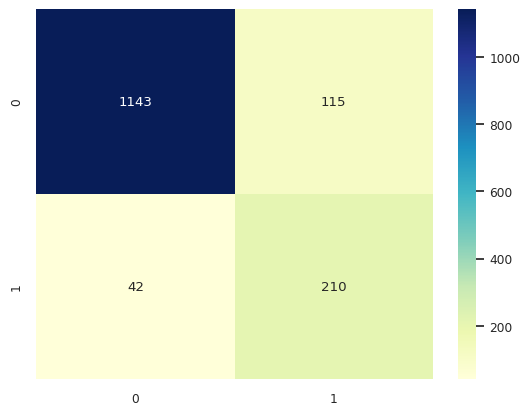

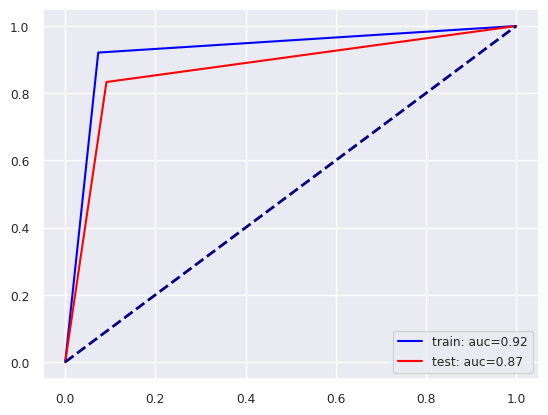

----------------------------------------------------------------------------------------------------


<ipython-input-40-3ce361fe56c4>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Resampling Method': resampler_name,


Classifier: RandomForestClassifier
Train classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1885
           1       1.00      1.00      1.00      1885

    accuracy                           1.00      3770
   macro avg       1.00      1.00      1.00      3770
weighted avg       1.00      1.00      1.00      3770

Test classification report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1258
           1       0.91      0.86      0.88       252

    accuracy                           0.96      1510
   macro avg       0.94      0.92      0.93      1510
weighted avg       0.96      0.96      0.96      1510



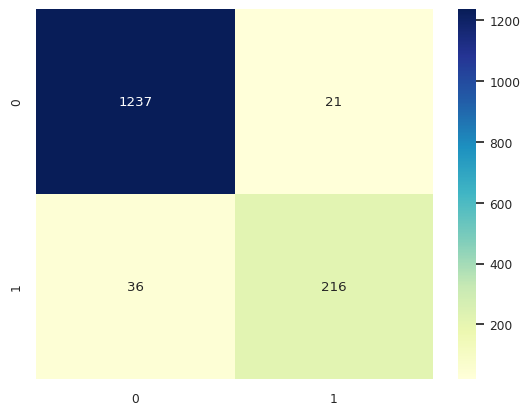

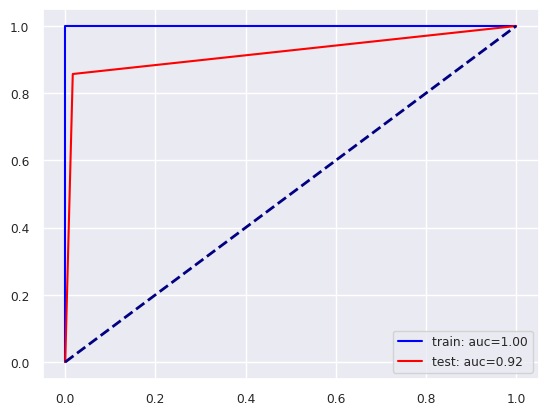

----------------------------------------------------------------------------------------------------
Classifier: BaggingClassifier
Train classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1885
           1       1.00      1.00      1.00      1885

    accuracy                           1.00      3770
   macro avg       1.00      1.00      1.00      3770
weighted avg       1.00      1.00      1.00      3770

Test classification report:


<ipython-input-40-3ce361fe56c4>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Resampling Method': resampler_name,


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1258
           1       0.85      0.85      0.85       252

    accuracy                           0.95      1510
   macro avg       0.91      0.91      0.91      1510
weighted avg       0.95      0.95      0.95      1510



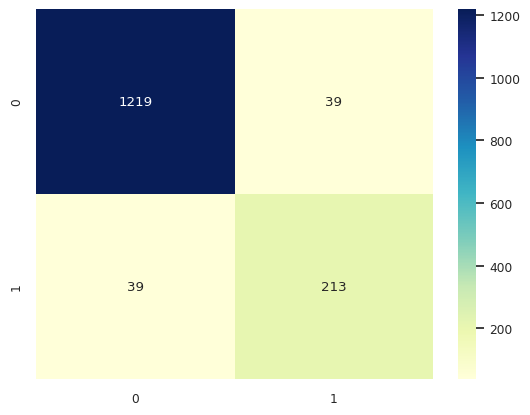

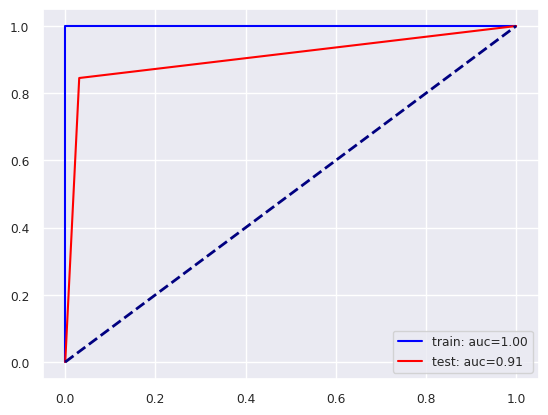

----------------------------------------------------------------------------------------------------
Classifier: GaussianNB
Train classification report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1885
           1       0.76      0.84      0.80      1885

    accuracy                           0.79      3770
   macro avg       0.79      0.79      0.79      3770
weighted avg       0.79      0.79      0.79      3770

Test classification report:
              precision    recall  f1-score   support

           0       0.95      0.73      0.83      1258
           1       0.38      0.81      0.51       252

    accuracy                           0.75      1510
   macro avg       0.66      0.77      0.67      1510
weighted avg       0.85      0.75      0.77      1510



<ipython-input-40-3ce361fe56c4>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Resampling Method': resampler_name,


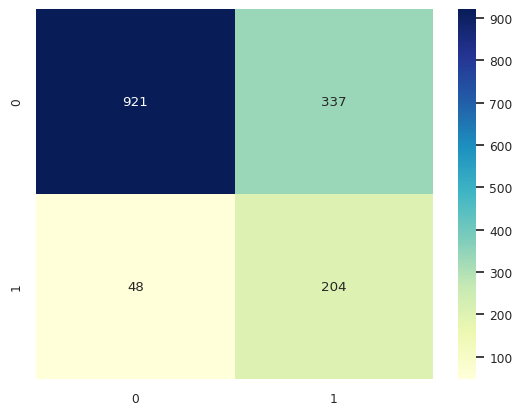

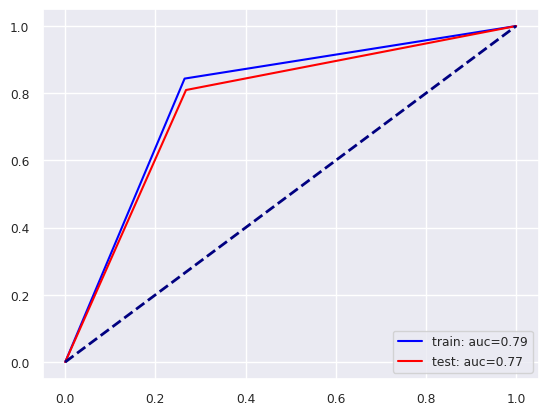

----------------------------------------------------------------------------------------------------


<ipython-input-40-3ce361fe56c4>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Resampling Method': resampler_name,


Classifier: XGBClassifier
Train classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1885
           1       1.00      1.00      1.00      1885

    accuracy                           1.00      3770
   macro avg       1.00      1.00      1.00      3770
weighted avg       1.00      1.00      1.00      3770

Test classification report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1258
           1       0.85      0.89      0.87       252

    accuracy                           0.96      1510
   macro avg       0.92      0.93      0.92      1510
weighted avg       0.96      0.96      0.96      1510



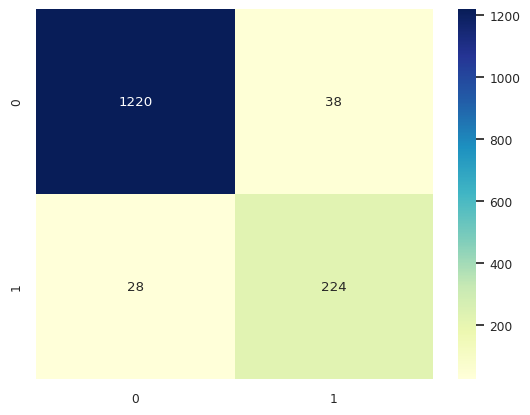

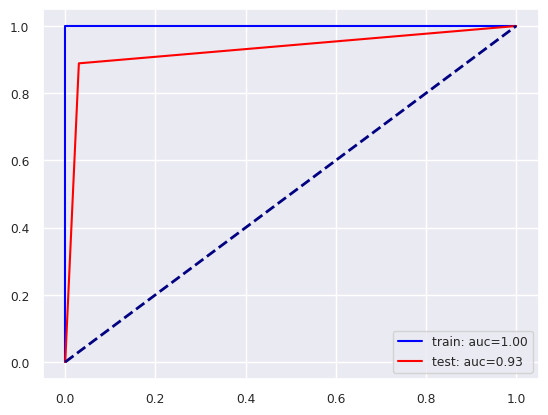

----------------------------------------------------------------------------------------------------
Resampling Method: SMOTE


<ipython-input-40-3ce361fe56c4>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Resampling Method': resampler_name,


Classifier: KNeighborsClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.99      0.85      0.92      1885
           1       0.87      0.99      0.93      1885

    accuracy                           0.92      3770
   macro avg       0.93      0.92      0.92      3770
weighted avg       0.93      0.92      0.92      3770

Test classification report:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1258
           1       0.45      0.87      0.59       252

    accuracy                           0.80      1510
   macro avg       0.71      0.83      0.73      1510
weighted avg       0.88      0.80      0.82      1510



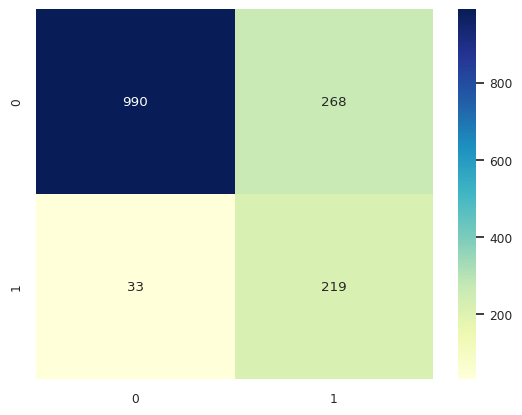

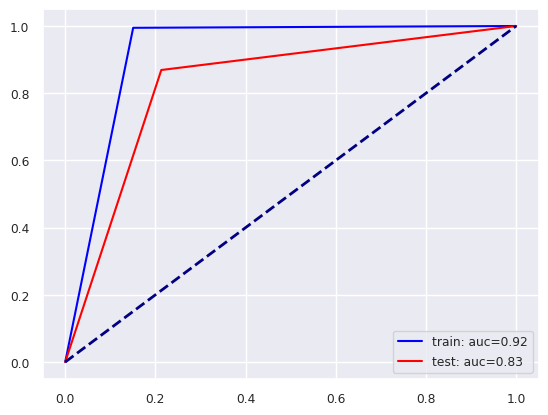

----------------------------------------------------------------------------------------------------


<ipython-input-40-3ce361fe56c4>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Resampling Method': resampler_name,
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier: LogisticRegression
Train classification report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1885
           1       0.79      0.84      0.82      1885

    accuracy                           0.81      3770
   macro avg       0.81      0.81      0.81      3770
weighted avg       0.81      0.81      0.81      3770

Test classification report:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      1258
           1       0.42      0.76      0.54       252

    accuracy                           0.79      1510
   macro avg       0.68      0.78      0.70      1510
weighted avg       0.86      0.79      0.81      1510



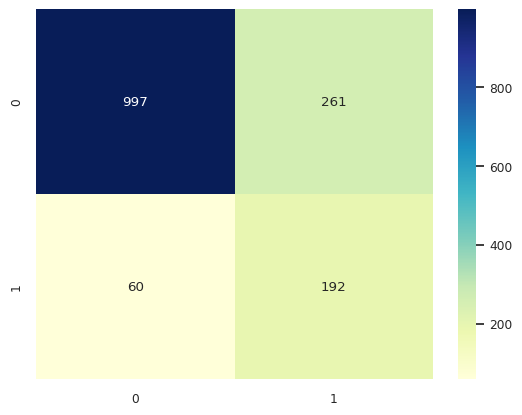

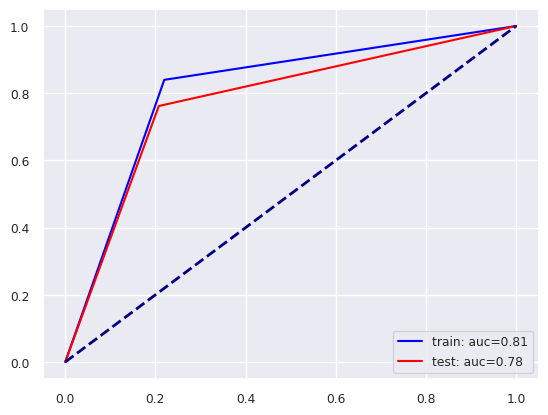

----------------------------------------------------------------------------------------------------


<ipython-input-40-3ce361fe56c4>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Resampling Method': resampler_name,


Classifier: GradientBoostingClassifier
Train classification report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1885
           1       0.95      0.95      0.95      1885

    accuracy                           0.95      3770
   macro avg       0.95      0.95      0.95      3770
weighted avg       0.95      0.95      0.95      3770

Test classification report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1258
           1       0.68      0.74      0.71       252

    accuracy                           0.90      1510
   macro avg       0.81      0.83      0.82      1510
weighted avg       0.90      0.90      0.90      1510



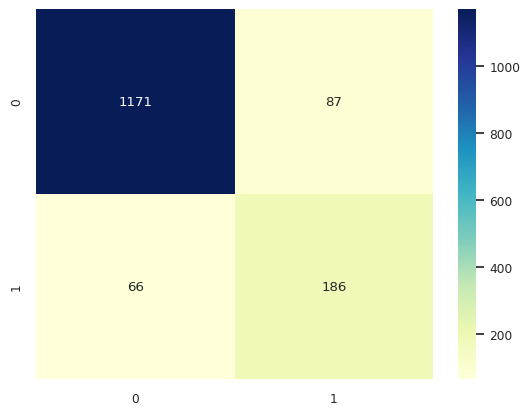

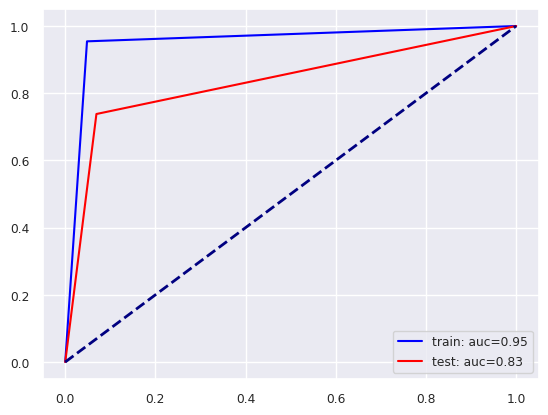

----------------------------------------------------------------------------------------------------


<ipython-input-40-3ce361fe56c4>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Resampling Method': resampler_name,


Classifier: RandomForestClassifier
Train classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1885
           1       1.00      1.00      1.00      1885

    accuracy                           1.00      3770
   macro avg       1.00      1.00      1.00      3770
weighted avg       1.00      1.00      1.00      3770

Test classification report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1258
           1       0.83      0.79      0.81       252

    accuracy                           0.94      1510
   macro avg       0.89      0.88      0.89      1510
weighted avg       0.94      0.94      0.94      1510



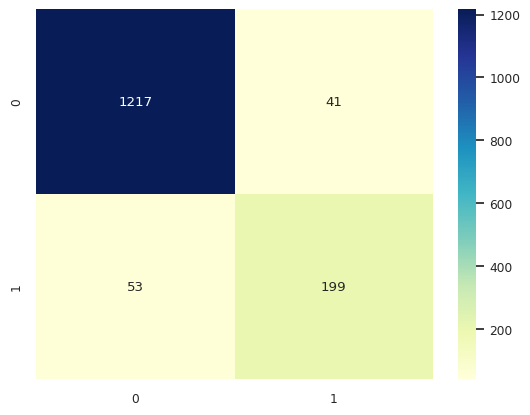

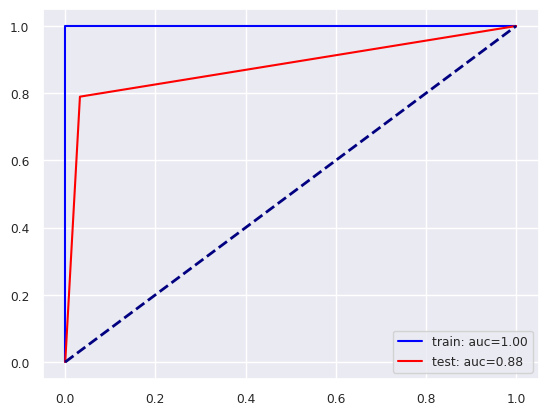

----------------------------------------------------------------------------------------------------


<ipython-input-40-3ce361fe56c4>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Resampling Method': resampler_name,


Classifier: BaggingClassifier
Train classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1885
           1       1.00      1.00      1.00      1885

    accuracy                           1.00      3770
   macro avg       1.00      1.00      1.00      3770
weighted avg       1.00      1.00      1.00      3770

Test classification report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1258
           1       0.76      0.71      0.74       252

    accuracy                           0.91      1510
   macro avg       0.85      0.83      0.84      1510
weighted avg       0.91      0.91      0.91      1510



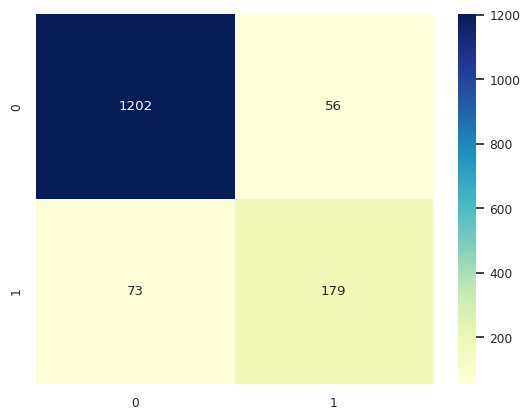

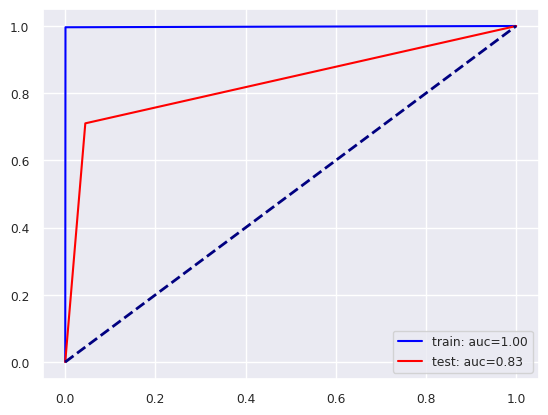

----------------------------------------------------------------------------------------------------
Classifier: GaussianNB
Train classification report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75      1885
           1       0.74      0.83      0.78      1885

    accuracy                           0.77      3770
   macro avg       0.77      0.77      0.77      3770
weighted avg       0.77      0.77      0.77      3770

Test classification report:
              precision    recall  f1-score   support

           0       0.92      0.72      0.80      1258
           1       0.33      0.69      0.44       252

    accuracy                           0.71      1510
   macro avg       0.62      0.70      0.62      1510
weighted avg       0.82      0.71      0.74      1510



<ipython-input-40-3ce361fe56c4>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Resampling Method': resampler_name,


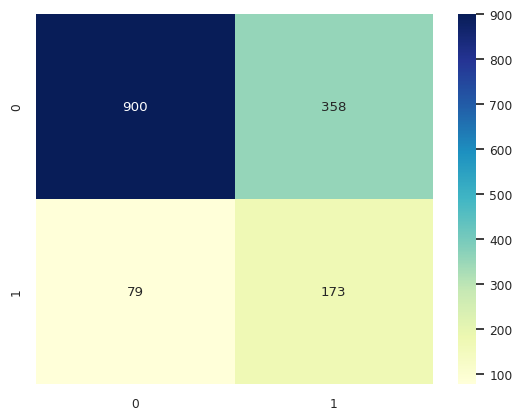

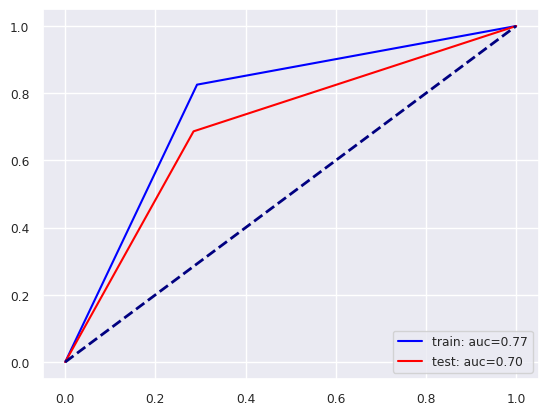

----------------------------------------------------------------------------------------------------


<ipython-input-40-3ce361fe56c4>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Resampling Method': resampler_name,


Classifier: XGBClassifier
Train classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1885
           1       1.00      1.00      1.00      1885

    accuracy                           1.00      3770
   macro avg       1.00      1.00      1.00      3770
weighted avg       1.00      1.00      1.00      3770

Test classification report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1258
           1       0.86      0.82      0.84       252

    accuracy                           0.95      1510
   macro avg       0.91      0.90      0.91      1510
weighted avg       0.95      0.95      0.95      1510



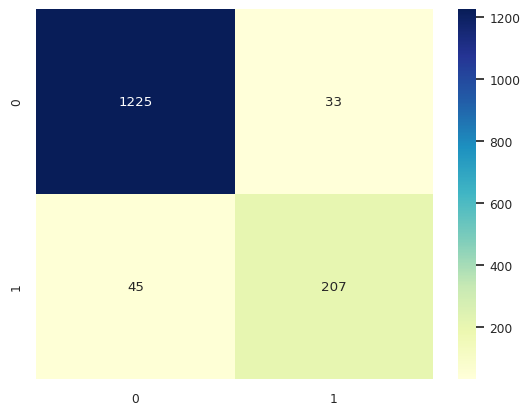

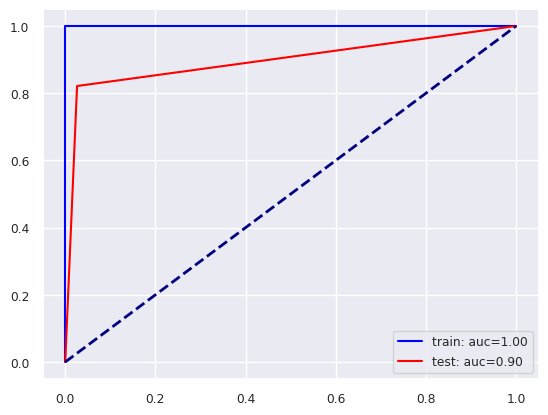

----------------------------------------------------------------------------------------------------
Summary of Classifier Scores:
       Resampling Method                  Classifier  Precision    Recall  \
13   Random Oversampling                     XGBoost   0.854962  0.888889   
10   Random Oversampling      RandomForestClassifier   0.911392  0.857143   
11   Random Oversampling           BaggingClassifier   0.845238  0.845238   
20                 SMOTE                     XGBoost   0.862500  0.821429   
3   Random Undersampling      RandomForestClassifier   0.588384  0.924603   
6   Random Undersampling                     XGBoost   0.567568  0.916667   
17                 SMOTE      RandomForestClassifier   0.829167  0.789683   
9    Random Oversampling  GradientBoostingClassifier   0.646154  0.833333   
4   Random Undersampling           BaggingClassifier   0.576316  0.869048   
2   Random Undersampling  GradientBoostingClassifier   0.548223  0.857143   
16                 SMO

<ipython-input-40-3ce361fe56c4>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append({'Resampling Method': resampler_name,


In [40]:
# List of classifiers
classifiers = [
    [KNeighborsClassifier(n_neighbors=5), 'KneighborsClassifier'],
    [LogisticRegression(solver='lbfgs'), 'LogisticRegression'],
    [GradientBoostingClassifier(), 'GradientBoostingClassifier'],
    [RandomForestClassifier(), 'RandomForestClassifier'],
    [BaggingClassifier(), 'BaggingClassifier'],
    [GaussianNB(), 'GaussianNB'],
    [xgb.XGBClassifier(), 'XGBoost']
]

def fit_evaluate(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print(f"Classifier: {clf.__class__.__name__}")
    print("Train classification report:")
    print(classification_report(y_train, y_pred_train))
    print("Test classification report:")
    print(classification_report(y_test, y_pred_test))

    sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='g', cmap='YlGnBu')
    plt.show()

    fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
    auc_train = roc_auc_score(y_train, y_pred_train)
    plt.plot(fpr_train, tpr_train, color='Blue', label='train: auc=' + f'{auc_train:.2f}')

    fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
    auc_test = roc_auc_score(y_test, y_pred_test)
    plt.plot(fpr_test, tpr_test, color='Red', label='test: auc=' + f'{auc_test:.2f}')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.legend(loc=4)
    plt.show()

    return auc_test

# Create a list of resampling methods
resampling_methods = [
    [RandomUnderSampler(random_state=0), 'Random Undersampling'],
    [RandomOverSampler(random_state=0), 'Random Oversampling'],
    [SMOTE(random_state=0), 'SMOTE']
]

# Create an empty DataFrame to store the scores
score_df = pd.DataFrame(columns=['Resampling Method', 'Classifier', 'Precision', 'Recall', 'F1-Score', 'Support', 'AUC'])

# Loop through resampling methods
for resampler, resampler_name in resampling_methods:
    print(f"Resampling Method: {resampler_name}")

    # Loop through classifiers and evaluate with resampling
    for clf, clf_name in classifiers:
        X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)

        # Evaluate the classifier with resampling
        auc_test = fit_evaluate(clf, X_resampled, X_test, y_resampled, y_test)
        print('-' * 100)

        # Calculate and append precision, recall, f1-score, and support
        precision, recall, f1, support = precision_recall_fscore_support(y_test, clf.predict(X_test), average='binary')

        # Append the scores to the DataFrame
        score_df = score_df.append({'Resampling Method': resampler_name,
                                    'Classifier': clf_name,
                                    'Precision': precision,
                                    'Recall': recall,
                                    'F1-Score': f1,
                                    'Support': support,
                                    'AUC': auc_test},
                                   ignore_index=True)

# Sort the DataFrame by AUC in descending order
score_df = score_df.sort_values(by='AUC', ascending=False)

# Display the summary table
print("Summary of Classifier Scores:")
print(score_df)

##Feature Importance

Feature Importance Ranking:
1. Tenure: 0.23214250802993774
2. Complain: 0.11468856036663055
3. NumberOfAddress: 0.06784974038600922
4. DaySinceLastOrder: 0.05811326578259468
5. PreferedOrderCat: 0.049817509949207306
6. NumberOfDeviceRegistered: 0.048678360879421234
7. CityTier: 0.04820762202143669
8. PreferredLoginDevice: 0.04579707607626915
9. MaritalStatus: 0.04352914169430733
10. SatisfactionScore: 0.0412345714867115
11. WarehouseToHome: 0.037667687982320786
12. OrderCount: 0.03478073328733444
13. OrderAmountHikeFromlastYear: 0.03471861034631729
14. Gender: 0.034656256437301636
15. PreferredPaymentMode: 0.03211682662367821
16. CashbackAmount: 0.0295635387301445
17. CouponUsed: 0.025327511131763458
18. HourSpendOnApp: 0.02111048623919487


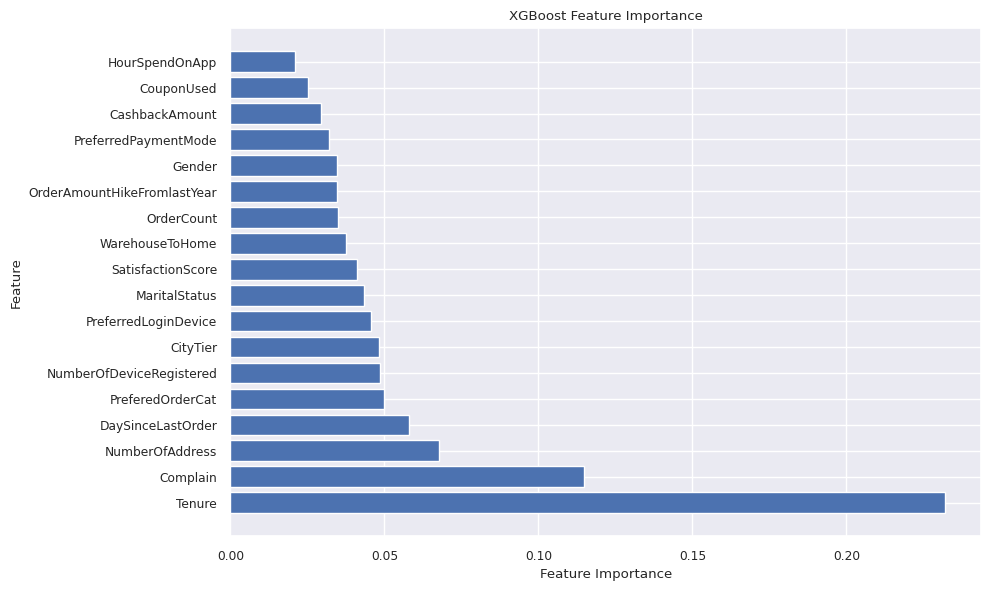

In [42]:
# Define the XGBoost model
xgb_model = xgb.XGBClassifier()

# Fit the classifier to the data using X_train (without SMOTE)
xgb_model.fit(X_train, y_train)

# Get feature importances
feature_importances = xgb_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort indices of features by their importance
sorted_indices = feature_importances.argsort()[::-1]

# Print feature importance ranking
print("Feature Importance Ranking:")
for i, idx in enumerate(sorted_indices):
    print(f"{i + 1}. {feature_names[idx]}: {feature_importances[idx]}")

# Plot feature importance horizontally
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_indices])
plt.yticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices])
plt.ylabel("Feature")
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()
